# Lead Scoring Case Study

## Problem Statement:
 
 An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of the Case Study:
There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


# A. Importing Libraries and Understanding Data

### 1 Import Libraries

In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# supress warnings
import warnings
warnings.filterwarnings("ignore")



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score


#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
#Environment settings

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)

# pd.set_option('display.float_format', lambda x: '%.4f' % x) 

### 2 Reading Data (.csv File) and Understanding Data 

In [3]:

df_leads = pd.read_csv(r"D:\IITB\Lead Score Case Study\Lead Scoring Assignment\Leads.csv")

In [4]:
# We will use head,Shape, Describe and Info 

In [5]:
df_leads.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [6]:
df_leads.shape

(9240, 37)

In [7]:

df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:

df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
# WE CAN SEE THAT WE HAVE NULL VALUES IN FEW COLUMNS

In [10]:
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
(df_leads.isna().mean().round(4) * 100).sort_values(ascending = False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [12]:
 # WE CANS SEE THAT WE HAVE MANY COLUMNS WITH MORE THAN 40% OF NULL VALUES WHICH CAN BE DROPPED

# B. Data Cleaning

### 3 Checking for Select Values and replacing with Nulll

In [13]:
#As stated in Problem Statment, we need to consider 'Select' as Null, hence we will find all Column with Select values and replace it with Null. 

In [14]:
for col in df_leads.columns:
            if (df_leads[col].isin(['Select']).sum())>1:
                D=col
                print(D,'----',df_leads[D].isin(['Select']).count())
                

Specialization ---- 9240
How did you hear about X Education ---- 9240
Lead Profile ---- 9240
City ---- 9240


In [15]:
# We have 4 Columns with Select Value which we need to Consider as 'NULL' hence we will substitute them woth Null

In [16]:
df_leads = df_leads.replace('Select', np.nan)

In [17]:
(df_leads.isna().mean().round(4) * 100).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

### Handeling Null Values

### 4. Droping Columns with more than 40% NuLL Values

In [18]:
b=(df_leads.isna().mean().round(4) * 100)

In [19]:
higher_null_value_cols = b[b.values >=40.00].index.tolist()

In [20]:
len(higher_null_value_cols)

7

In [21]:
for x in higher_null_value_cols:
        df_leads = df_leads.drop(columns=x, axis=1)

In [22]:
df_leads.shape

(9240, 30)

In [23]:
# Checking the percentage of null values for remaining columns

(df_leads.isna().mean().round(4) * 100).sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [24]:
# Select the columns with non-numeric data type
categorical_cols = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()

# Print the selected columns
print(categorical_cols)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [25]:
 # Now we have 8 cat Columns with Null Valies 
columnsList= ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

In [26]:
df_leads[columnsList].isna().mean().round(4) * 100

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64

In [27]:
for i in columnsList:
    print(df_leads[i].value_counts(normalize=True))
    print("====="*20)

City
Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: proportion, dtype: float64
Specialization
Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribus

### 5. Droping Columns as have High Missing Values and Uneven Distribution of Data

City: With 39.71 missing data, imputing with "Mumbai" would skew the results. Since location isn't crucial for the model, we'll drop the City column.

Tags: This column (36.29% missing) reflects the current lead status, which isn't directly relevant for modeling future behavior. We'll drop the Tags column.

What matters most in choosing a course: A massive skew exists here (99.95% selecting "better career prospects") with significant missing values (29.32%). This offers minimal insights, so we'll drop this column.


Country: Nearly all customers (96%) are from India. Imputing missing values with "India" wouldn't be practical for current business operations. We'll drop the Country column.

In [28]:
df_leads.drop(['City','Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)

In [29]:
df_leads.shape

(9240, 26)

### 6. Imputing categorical columns missing values 

Specialization: Fortunately, the missing values (36.58%) are spread evenly across specializations. Imputing or dropping isn't ideal. Therefore, we'll create a new category named "Others" to capture these cases.

What is your current occupation: Approx 85% of data has value 'Unemployed', hence imputing missing values with "Unemployed" (the most frequent value) seems reasonable. 

Last Activity: Missing values are very low (1.11%) with "Email Opened" being the most frequent activity. We'll impute missing values with "Email Opened" for consistency.

Lead Source: Similar to Last Activity, missing values are minimal (0.39%) with "Google" as the most common source. We'll impute missing values with "Google" for consistency.

In [30]:
missing_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
df_leads=df_leads.fillna(value=missing_values)

In [31]:
# Checking for Null Values If Any?

In [32]:
(df_leads.isna().mean().round(4) * 100).sort_values(ascending = False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

### 7. Imputing numeric columns missing values 

In [33]:
#  No We have two Numeric Columns with Null Values (TotalVisits/Page Views Per Visit) 

In [34]:
df_leads.TotalVisits.value_counts().head(10)

TotalVisits
0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: count, dtype: int64

In [35]:
# As we have Maximum values '0.0' and we have 1.48 % of Null values we can Impute it with Mode '0.0'.

In [36]:
df_leads['TotalVisits'].mode()

0    0.0
Name: TotalVisits, dtype: float64

In [37]:
df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].mode()[0], inplace=True)

In [38]:

df_leads.TotalVisits.value_counts().head(10)

TotalVisits
0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: count, dtype: int64

In [39]:
# As we have Maximum values '0.0' and we have 1.48 % of Null values we can Impute it with Mode '0.0'.

In [40]:
df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].mode()[0], inplace=True)

In [41]:
(df_leads.isna().mean().round(4) * 100).sort_values(ascending = False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

In [42]:
# We now have no Null values

### 8. Removing Columns with one unique Values

In [43]:
 # Columns with one unique values through out:

In [44]:


for cols in df_leads.columns:
        if df_leads[cols].value_counts().count()==1:
            print (cols)
    

Magazine
Receive More Updates About Our Courses
Update me on Supply Chain Content
Get updates on DM Content
I agree to pay the amount through cheque


In [45]:
# We can drop These Columns

In [46]:

cols_to_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']

df_leads.drop(cols_to_drop, axis = 1, inplace = True)


In [47]:
df_leads.shape

(9240, 21)

### 9. Dropping columns of no use for modeling

In [48]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No,No,No,No,No,No,No,Modified


In [49]:
# Dropping Columns

df_leads.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)


In [50]:
df_leads.shape

(9240, 18)

In [51]:
(df_leads.isna().mean().round(4) * 100).sort_values(ascending = False)

Lead Origin                               0.0
Lead Source                               0.0
Through Recommendations                   0.0
Digital Advertisement                     0.0
Newspaper                                 0.0
X Education Forums                        0.0
Newspaper Article                         0.0
Search                                    0.0
What is your current occupation           0.0
Specialization                            0.0
Last Activity                             0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Call                               0.0
Do Not Email                              0.0
A free copy of Mastering The Interview    0.0
dtype: float64

### 10. Outliers Check

#### For Numerical Columns

In [52]:
df_leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [53]:
# We have 3 Numeric Columns for which we need to check for outliers 

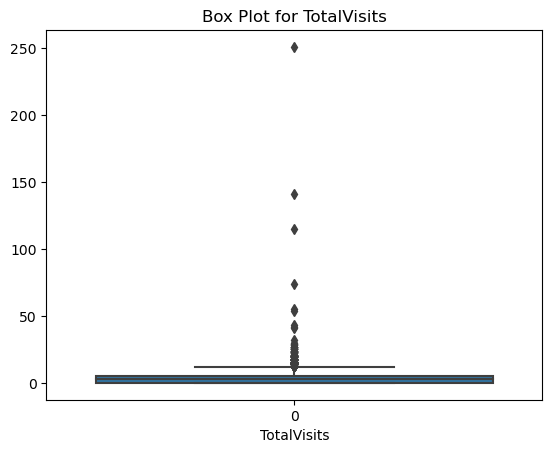

In [54]:
sns.boxplot(df_leads['TotalVisits'])
plt.xlabel('TotalVisits')

plt.title('Box Plot for TotalVisits')
plt.show()

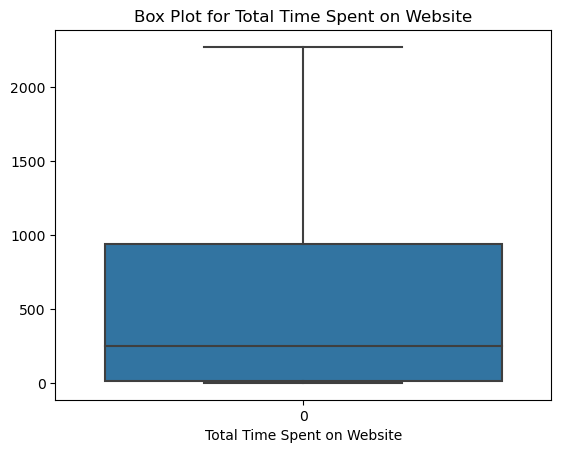

In [55]:
sns.boxplot(df_leads['Total Time Spent on Website'])
plt.xlabel('Total Time Spent on Website')

plt.title('Box Plot for Total Time Spent on Website')
plt.show()

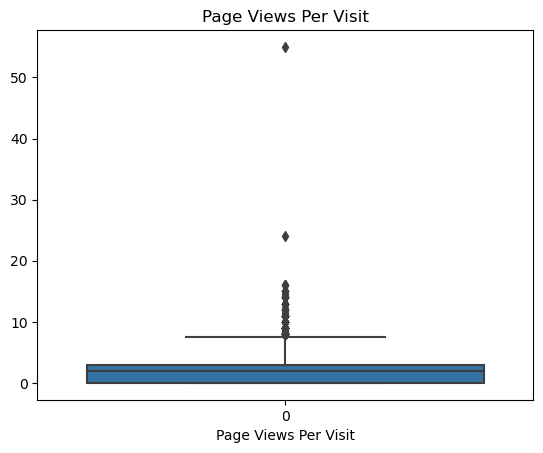

In [56]:
sns.boxplot(df_leads['Page Views Per Visit'])
plt.xlabel('Page Views Per Visit')

plt.title('Page Views Per Visit')
plt.show()

In [57]:
def outlier_fix(df, col):
    
    for i in col:
    #calculating quartile deviation
        q1 = np.quantile(df[col], q = 0.25)
        q3 = np.quantile(df[col], q = 0.75)
    
    #calculating inter-quartile range
        iqr = q3-q1
    
    #calculating lower and upper bound
        lower_bound = q1 - 1.5*iqr
        upper_bound = q3 + 1.5*iqr
    
        # capping upper_bound
        df[col] = np.where(df[col] > upper_bound, upper_bound,df[col])

        # flooring lower_bound
        df[col] = np.where(df[col] < lower_bound, lower_bound,df[col])
        
        
        

In [58]:

capping_cols = ["TotalVisits","Page Views Per Visit"]

outlier_fix(df_leads,capping_cols)

In [59]:
df_leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.134740,487.698268,2.307513
std,0.486714,2.787787,548.021466,2.020149
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,10.000000,2272.000000,10.000000


In [60]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [61]:
categorical_columns = df_leads.select_dtypes(include=['object']).columns.tolist()

In [62]:
categorical_columns

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

In [63]:
for i in categorical_columns:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts for :",i,"\n")
        print(perc,"\n")
      

value_counts for : Lead Origin 

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: proportion, dtype: float64 

value_counts for : Lead Source 

Lead Source
Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: proportion, dtype: float64 

valu

In [64]:
df_leads.shape

(9240, 18)

### 11. Grouping Low frequency values

In [65]:
# Grouping low frequency value levels to Others
df_leads['Lead Source'] = df_leads['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
df_leads['Lead Source'] = df_leads['Lead Source'].replace("google","Google")

In [66]:
# value_counts percentage after replace
df_leads["Lead Source"].value_counts(normalize=True)*100

Lead Source
Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: proportion, dtype: float64

In [67]:
# Grouping low frequency value levels to Others 
df_leads['Last Activity'] = df_leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [68]:
# value_counts percentage after replace
df_leads['Last Activity'].value_counts(normalize=True)*100

Last Activity
Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: proportion, dtype: float64

In [69]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
df_leads.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Renaming column name to "Current_occupation" from "What is your current occupationA free copy of Mastering The Interview"
df_leads.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)


### 12. Mapping Binary categorical variables

In [70]:
# Mapping binary categorical variables Yes to 1 and No to 0


df_leads['Do Not Email'] = df_leads['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

df_leads['Do Not Call'] = df_leads['Do Not Call'].apply(lambda x: 1 if x =='Yes' else 0)


df_leads['Search'] = df_leads['Search'].apply(lambda x: 1 if x =='Yes' else 0)

df_leads['Newspaper Article'] = df_leads['Newspaper Article'].apply(lambda x: 1 if x =='Yes' else 0)

df_leads['X Education Forums'] = df_leads['X Education Forums'].apply(lambda x: 1 if x =='Yes' else 0)

df_leads['Newspaper'] = df_leads['Newspaper'].apply(lambda x: 1 if x =='Yes' else 0)

df_leads['Newspaper'] = df_leads['Newspaper'].apply(lambda x: 1 if x =='Yes' else 0)

df_leads['Through Recommendations'] = df_leads['Through Recommendations'].apply(lambda x: 1 if x =='Yes' else 0)

df_leads['Free_copy'] = df_leads['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

df_leads['Digital Advertisement'] = df_leads['Digital Advertisement'].apply(lambda x: 1 if x =='Yes' else 0)




In [71]:
df_leads.head(10)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Free_copy
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0,0,0,0,0,0,0
5,API,Olark Chat,0,0,0,0.0,0,0.0,Olark Chat Conversation,Others,Unemployed,0,0,0,0,0,0,0
6,Landing Page Submission,Google,0,0,1,2.0,1640,2.0,Email Opened,Supply Chain Management,Unemployed,0,0,0,0,0,0,0
7,API,Olark Chat,0,0,0,0.0,0,0.0,Olark Chat Conversation,Others,Unemployed,0,0,0,0,0,0,0
8,Landing Page Submission,Direct Traffic,0,0,0,2.0,71,2.0,Email Opened,IT Projects Management,Unemployed,0,0,0,0,0,0,1
9,API,Google,0,0,0,4.0,58,4.0,Email Opened,Finance Management,Unemployed,0,0,0,0,0,0,0


# C.  Data Analysis (EDA)

### 13. Checking if Data is Imbalanced or not


In [72]:
df_leads.Converted.value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

In [73]:
(len(df_leads.Converted[df_leads['Converted'] ==1])/len(df_leads))*100

38.53896103896104

In [74]:
(len(df_leads.Converted[df_leads['Converted'] ==0])/len(df_leads))*100

61.46103896103896

Inference:
We can see that we have 38.53 conversion rate. 

### 14. Univariate Analysis

In [75]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Free_copy
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0,0,0,0,0,0,0


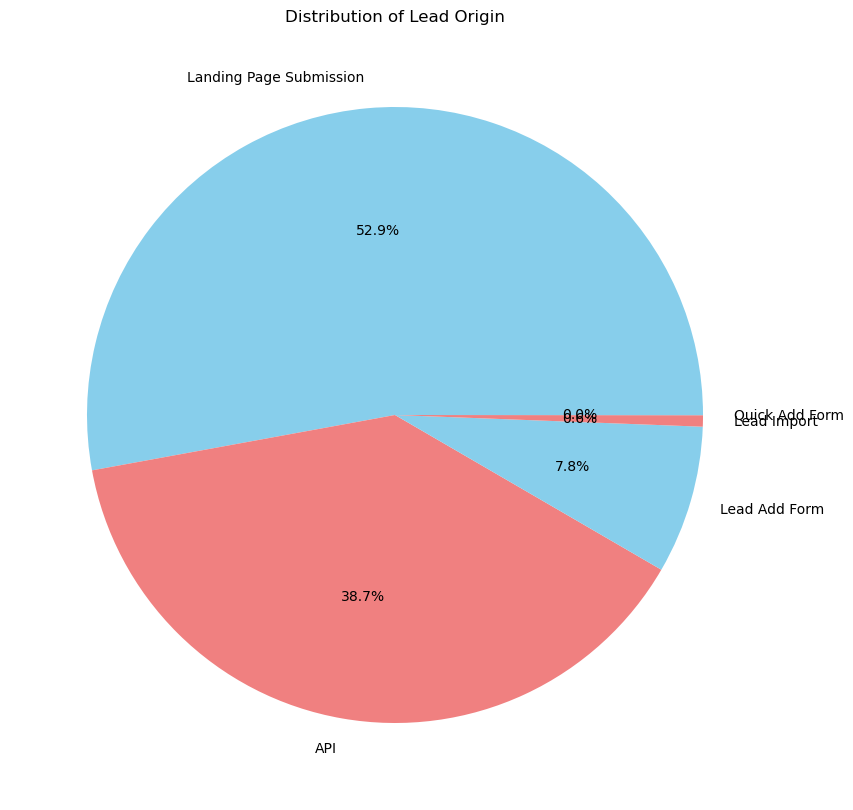

In [76]:
target_counts = df_leads['Lead Origin'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 10))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Lead Origin')
plt.show()

### Lead Origin: "Landing Page Submission" identified 53% customers, "API" identified 39%. 

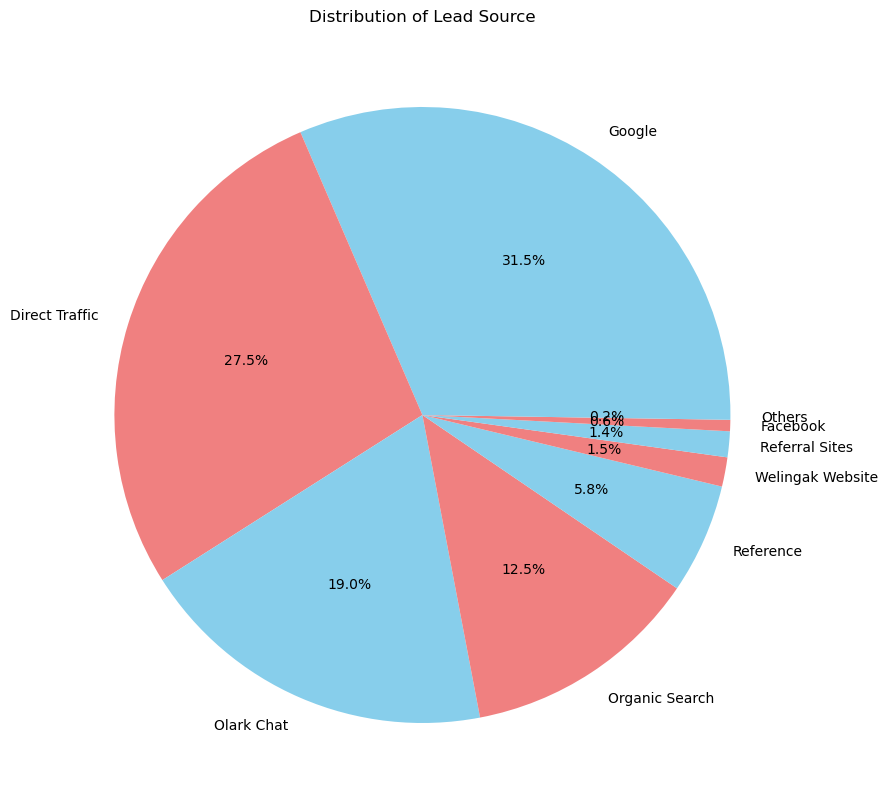

In [77]:
target_counts = df_leads['Lead Source'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 10))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Lead Source')
plt.show()


### Lead Source: 31.5% Lead source is from Google & 27.5% from Direct Traffic.

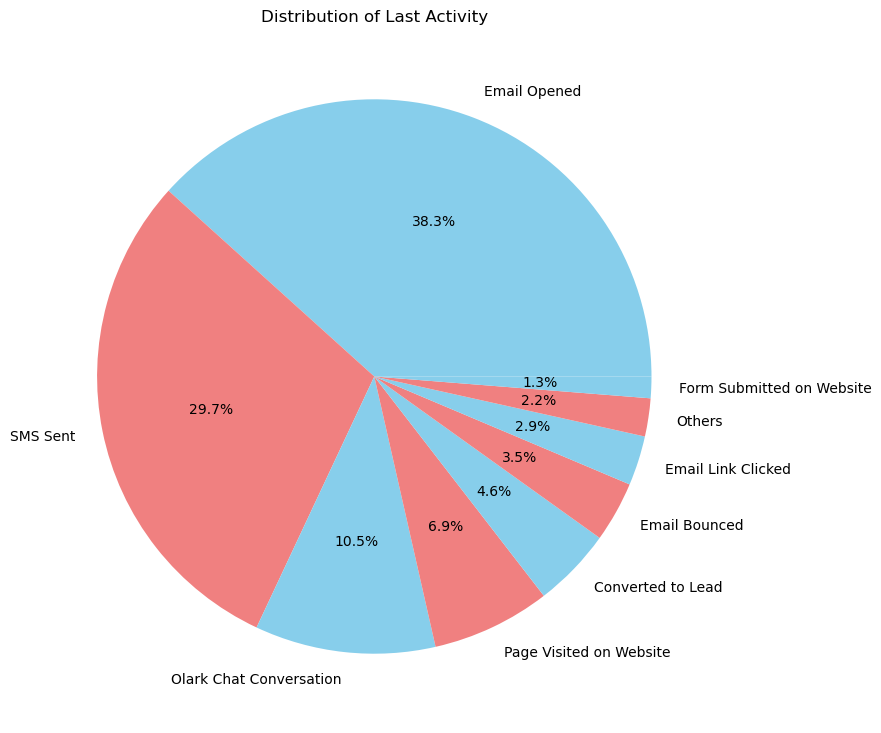

In [78]:
target_counts = df_leads['Last Activity'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(9, 9))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Last Activity')
plt.show()

### Last Activity: 68% of customers contribution in SMS Sent & Email Opened activities

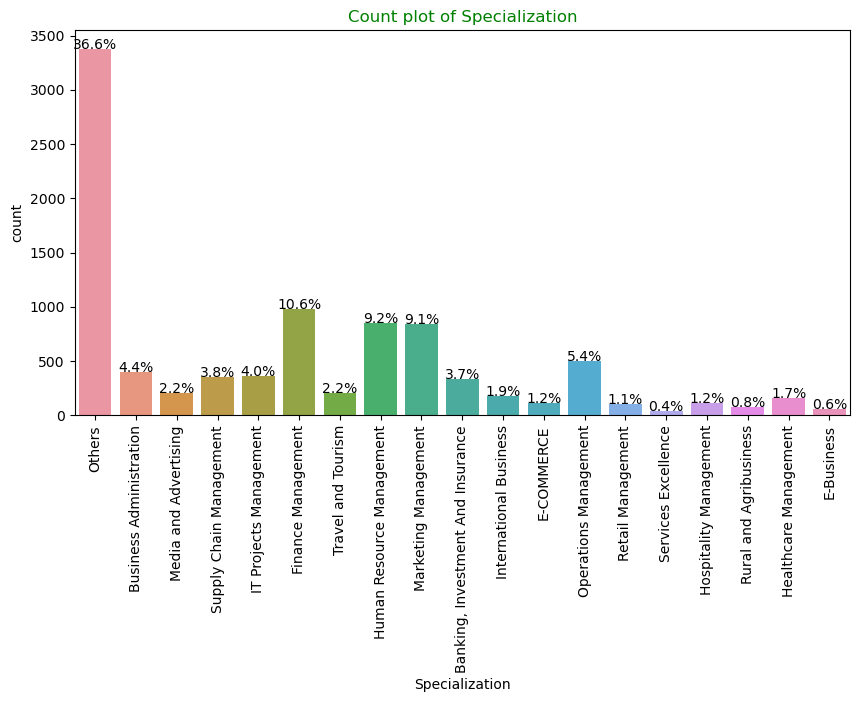

In [79]:
plt.figure(figsize=[10,5])
plt.title("Count plot of Specialization", color="green")
ax = sns.countplot(x='Specialization', data=df_leads)

plt.xticks(rotation=90)

# Calculate percentages for each category
total = len(df_leads['Specialization'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

### Specialization:  Apart from Finance Managemant, HR management and Marketing management we 36% customers from ‘Others’.


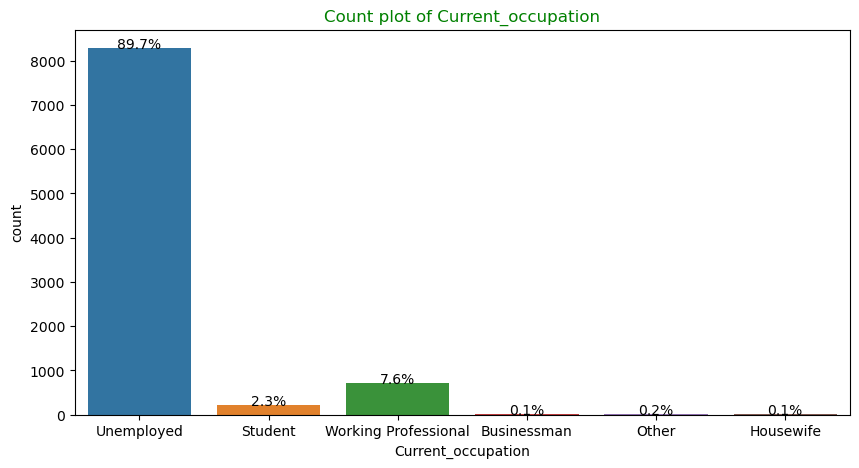

In [80]:

plt.figure(figsize=[10,5])
plt.title("Count plot of Current_occupation", color="green")
ax = sns.countplot(x='Current_occupation', data=df_leads)

plt.xticks(rotation=0)

# Calculate percentages for each category
total = len(df_leads['Current_occupation'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

### Current_occupation: It has 90% of the customers as Unemployed

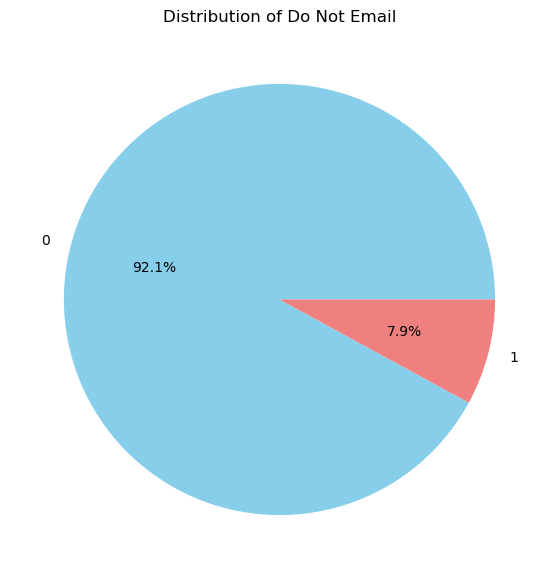

In [81]:
target_counts = df_leads['Do Not Email'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Do Not Email')
plt.show()

### Do Not Email: 92% of the people  dont want to be emailed about the course.

### 15. Bivariate Analysis


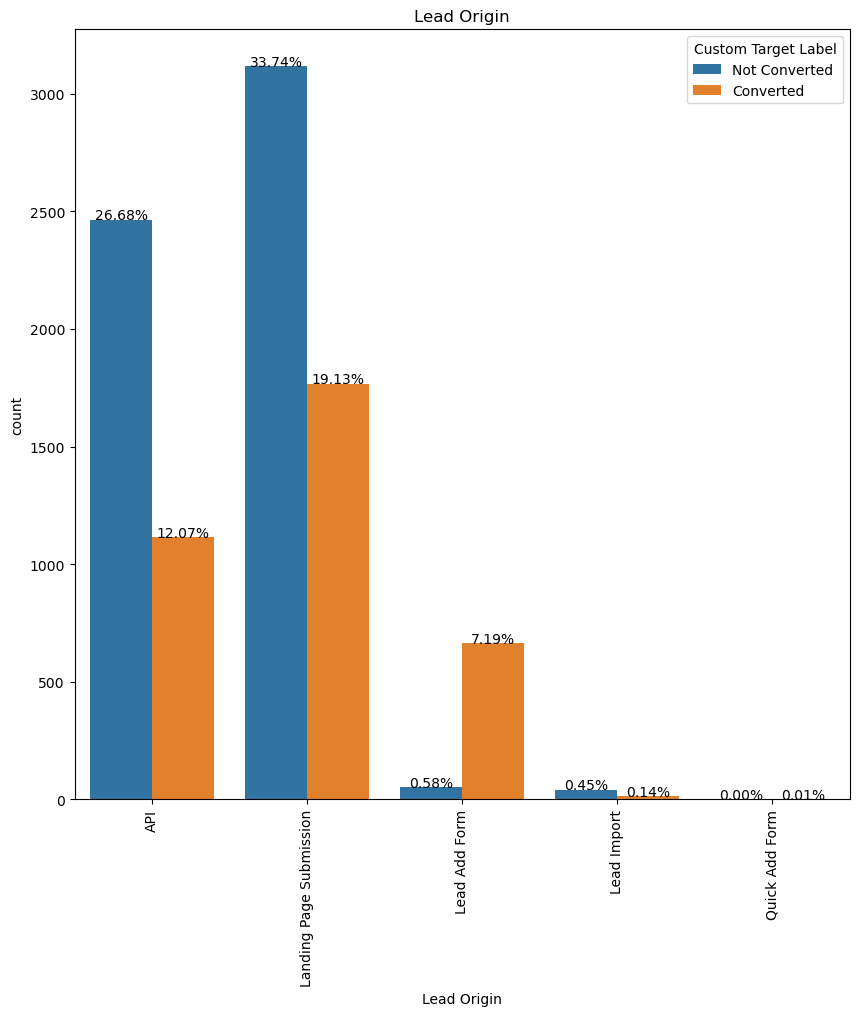

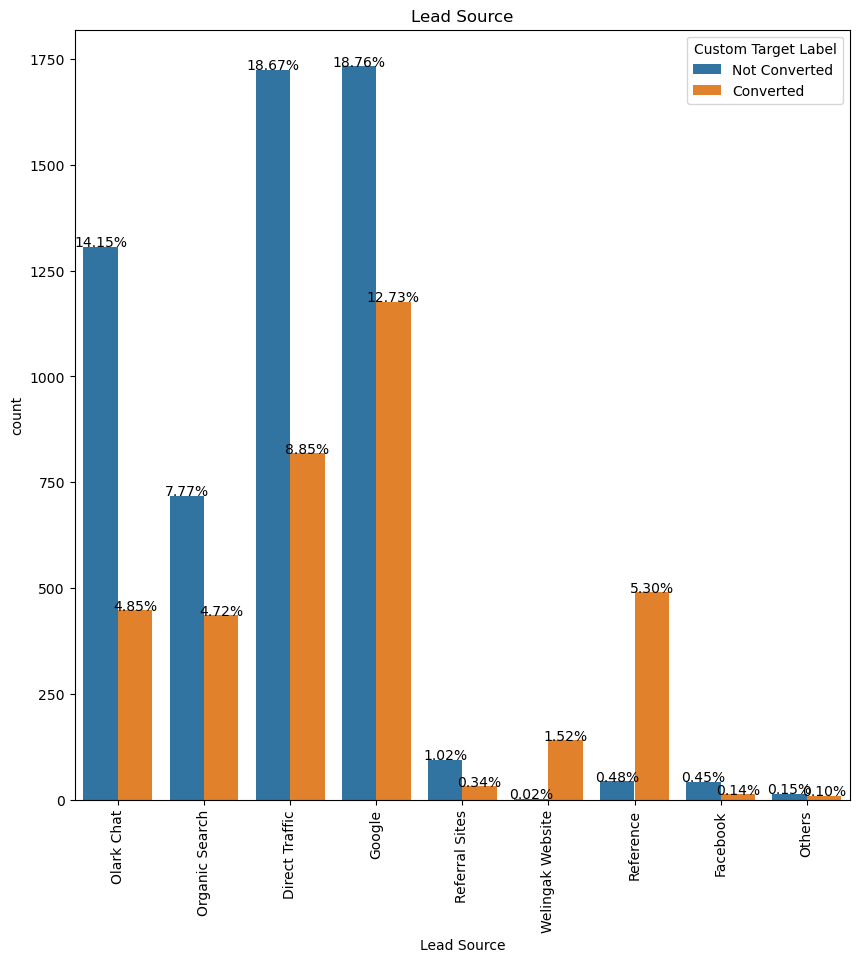

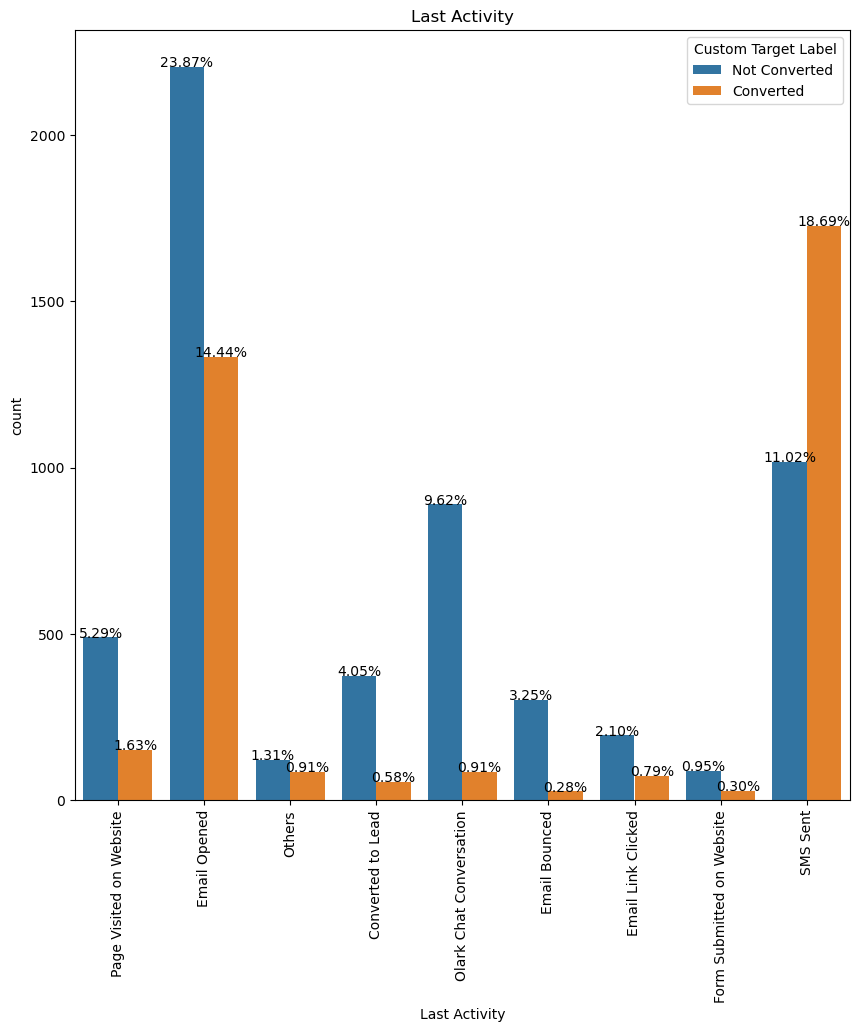

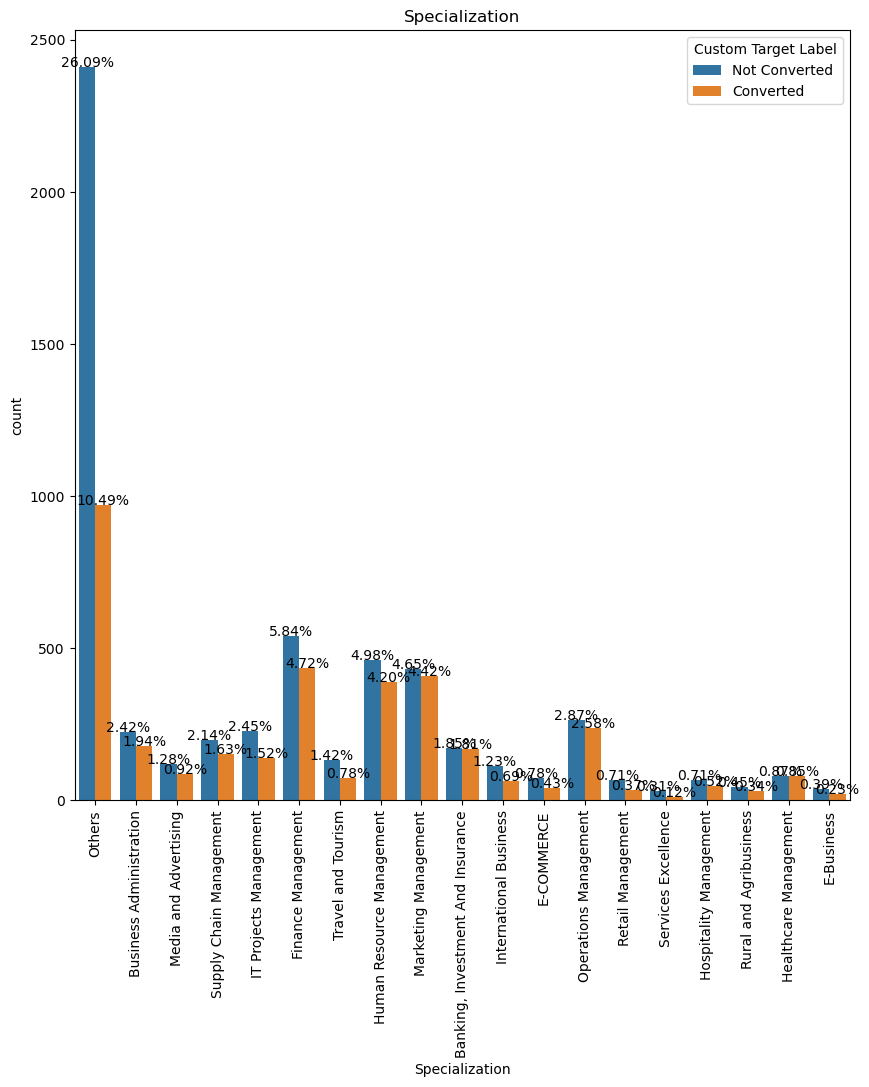

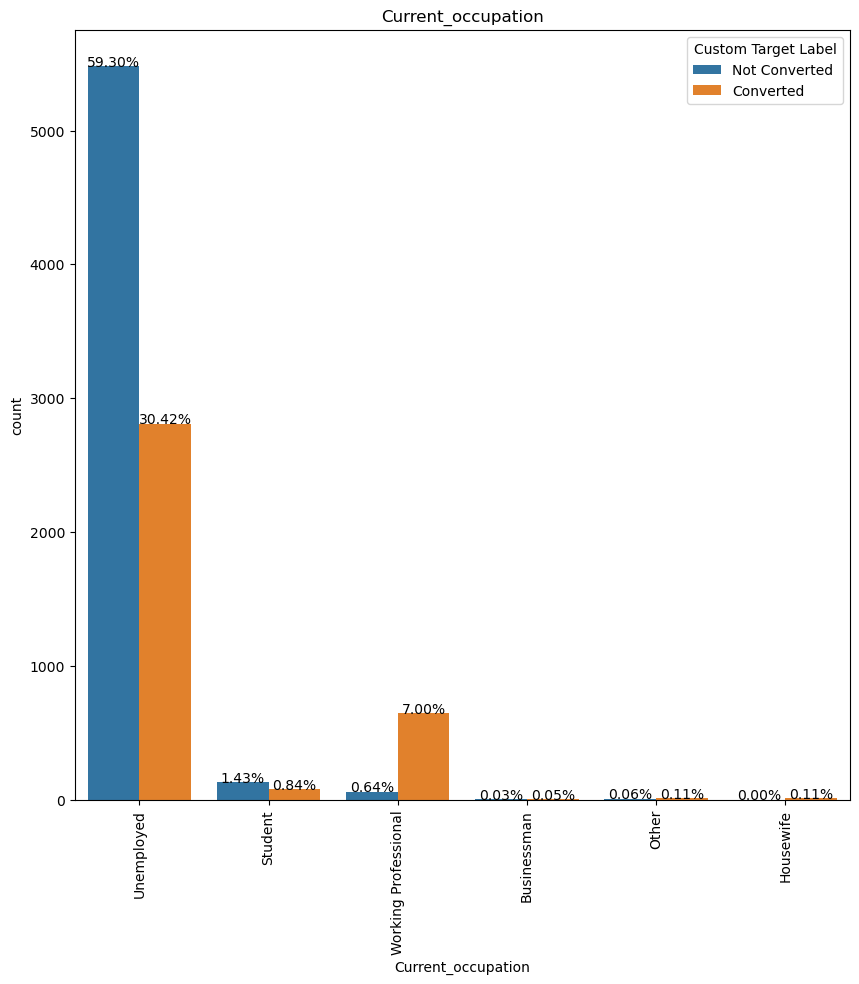

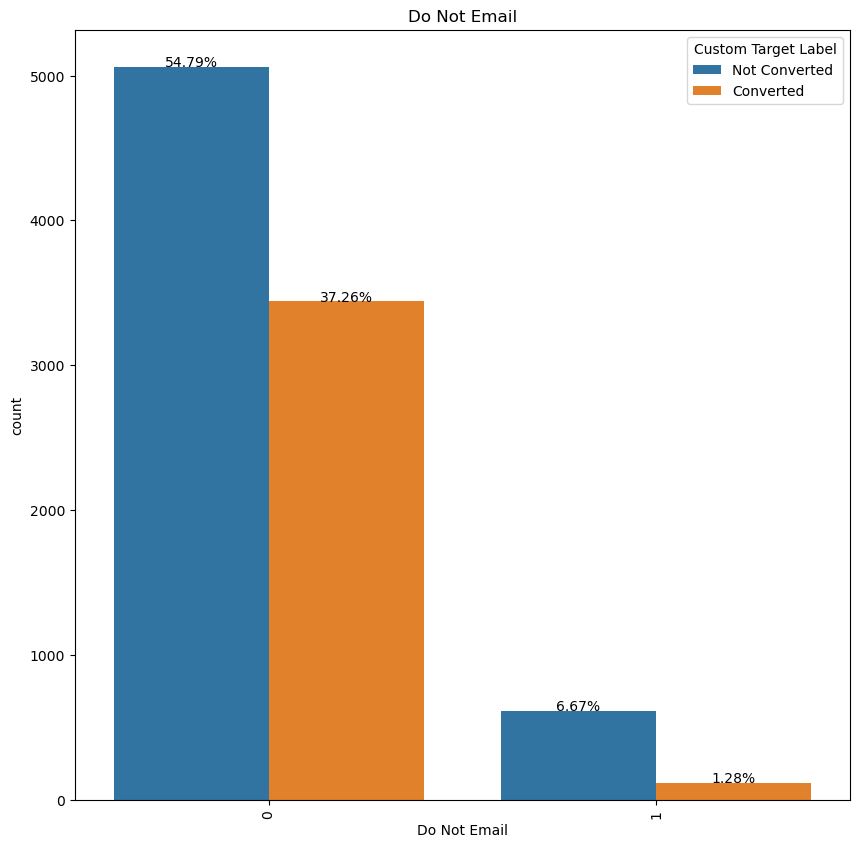

In [82]:
cols=['Lead Origin','Lead Source','Last Activity','Specialization','Current_occupation','Do Not Email']

for i in cols:
    plt.figure(figsize=(10, 10))  
    ax = sns.countplot(x=i, hue='Converted', data=df_leads)

    plt.title(i)
    plt.legend(title='Custom Target Label', labels=['Not Converted ', 'Converted'])
    plt.xlabel(i)
    plt.xticks(rotation=90)

    # Calculate percentages
    total = len(df_leads[i])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.2f}%'.format((height / total) * 100),
                ha="center")
    plt.show()

#### Important Observations from Bivariate Analysis:
Lead Origin:
We can see that leads originated from "Landing Page Submission is highest which is 52.87 (33.74 + 19.13) which has Lead conversion 36%
The "API"  has approximately 39% of Leads with a lead conversion rate (LCR) of 31% approximately.

Lead Source: 
Google has approx 30 % of Leads from which 40% of leads gets converted also 
Direct Traffic has approx 27% Leads from which has 32% of LCR.
Reference Share highest LCR which is 91.6 %


Last Activity: 
‘SMS Sent’ has highest LCR (61%), which has generated 29% of leads, where 'Email Opened' activity contributed 38% of last activities performed by the customers with 37% lead conversion rate.


Current_occupation: 
We can see that 90% of the customers are Unemployed with lead conversion rate (LCR) of 34%. 
While Working Professional has 7.6% of total customers and has 92% lead conversion rate (LCR).


In [83]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

<Figure size 1600x400 with 0 Axes>

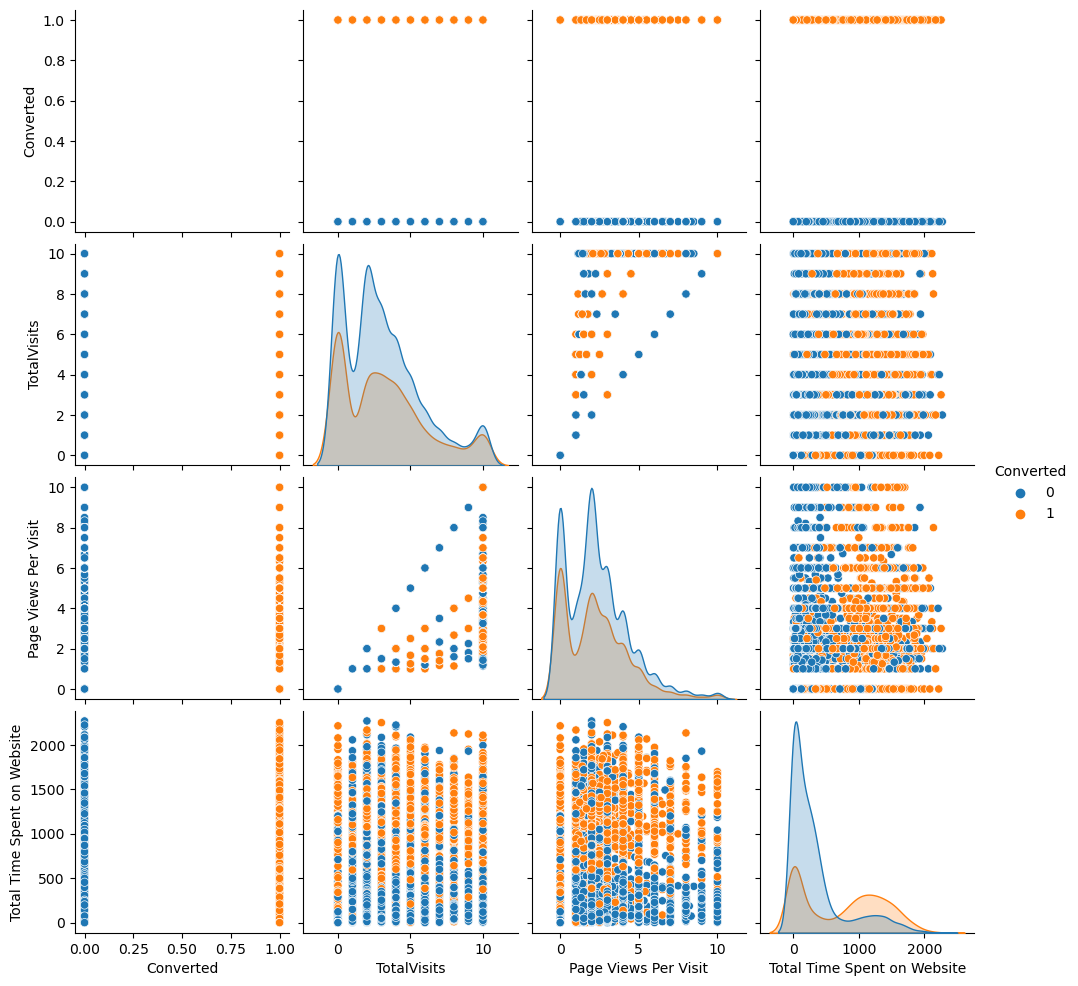

In [84]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=df_leads,vars=num_cols,hue="Converted")                                  
plt.show()

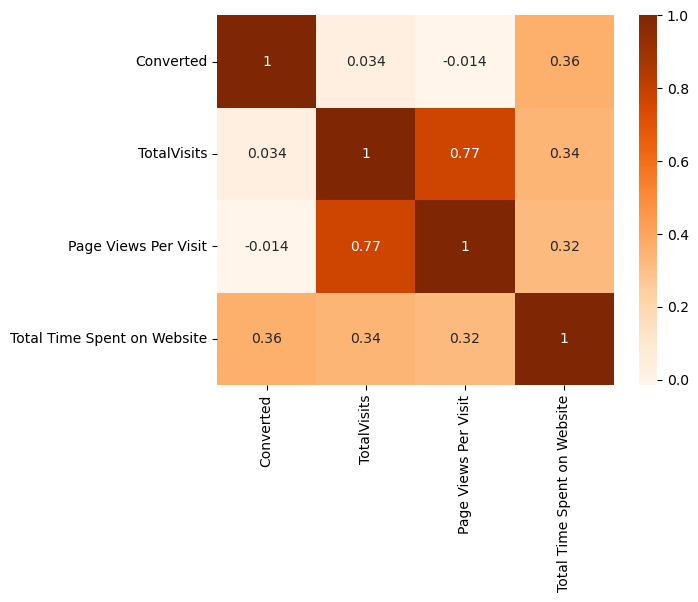

In [85]:
sns.heatmap(data=df_leads[num_cols].corr(), cmap="Oranges", annot=True)
plt.show()

### There is a strong positive correlation between 'Total Visits' and 'Page Views per Visit', indicating that customers who visit the website more frequently tend to view more pages per visit.

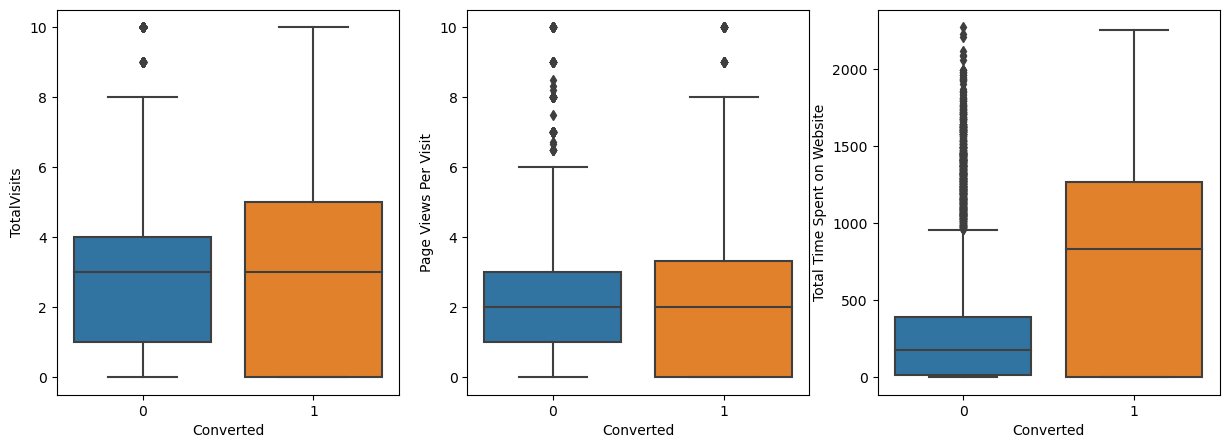

In [86]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df_leads)
plt.show()

<strong><span style="color:purple">Insights:</span></strong> 
- Past Leads who spends more time on Website are successfully converted than those who spends less as seen in the boxplot

# D. Data Preparation

### 16. Dummy Variables


In [87]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Free_copy
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0,0,0,0,0,0,0


In [88]:

# Creating a dummy variable for the categorical variables.
dummy = pd.get_dummies(df_leads[["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"]], drop_first=True)
# Converting dummy variables to integer representation (0 and 1)
dummy = dummy.astype(int)
# Adding the results to the master dataframe
df_leads = pd.concat([df_leads, dummy], axis=1)

In [89]:
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [90]:
# We can see that Dummy Variables have been created

In [91]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 61 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   int64  
 3   Do Not Call                               9240 non-null   int64  
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9240 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9240 non-null   float64
 8   Last Activity                             9240 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  Current_occupation                  

In [92]:
df_leads.shape

(9240, 61)

In [93]:
# As have created dummies for the below variables, so we can drop them

df_leads = df_leads.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"],axis=1)

In [94]:
df_leads.shape

(9240, 56)

In [95]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 56 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Do Not Call                               9240 non-null   int64  
 2   Converted                                 9240 non-null   int64  
 3   TotalVisits                               9240 non-null   float64
 4   Total Time Spent on Website               9240 non-null   int64  
 5   Page Views Per Visit                      9240 non-null   float64
 6   Search                                    9240 non-null   int64  
 7   Newspaper Article                         9240 non-null   int64  
 8   X Education Forums                        9240 non-null   int64  
 9   Newspaper                                 9240 non-null   int64  
 10  Digital Advertisement               

### 17. Test-Train Split 

In [96]:
# Putting predictor variables to X
X = df_leads.drop('Converted', axis=1)

# Putting Target variables to y
y = df_leads["Converted"]


In [97]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [98]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 55) 
y_train: (6468,)


In [99]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 55) 
y_test: (2772,)


### 18. Feature Scaling

In [100]:
X_test.head(10)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
4269,0,0,8.0,1011,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2376,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
7766,0,0,5.0,59,5.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
9199,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4359,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
9186,0,0,6.0,612,6.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1631,0,0,5.0,1013,5.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8963,0,0,3.0,268,1.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8007,0,0,3.0,344,3.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5324,0,0,3.0,160,3.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [101]:
# 3 columns ('TotalVisits','Total Time Spent on Website','Page Views Per Visit') needs to be scaled.

In [102]:
# using standard scaler for scaling the features
scaler = StandardScaler()


X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])




In [103]:
# X-train dataframe after standard scaling
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
1871,0,0,-1.121955,-0.885371,-1.140182,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6795,0,0,0.313260,0.005716,-0.479814,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3516,0,0,0.672063,-0.691418,0.101112,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8105,0,0,0.672063,1.365219,1.342407,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3934,0,0,-1.121955,-0.885371,-1.140182,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [104]:
# Checking the Lead Conversion Rate (LCR) - "Converted" is our Target Variable
# We will denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
LCR

38.53896103896104

<strong><span style="color:Blue">Note:</span></strong> We have 38.5% Conversion Rate

### 19.  Looking at Correlations

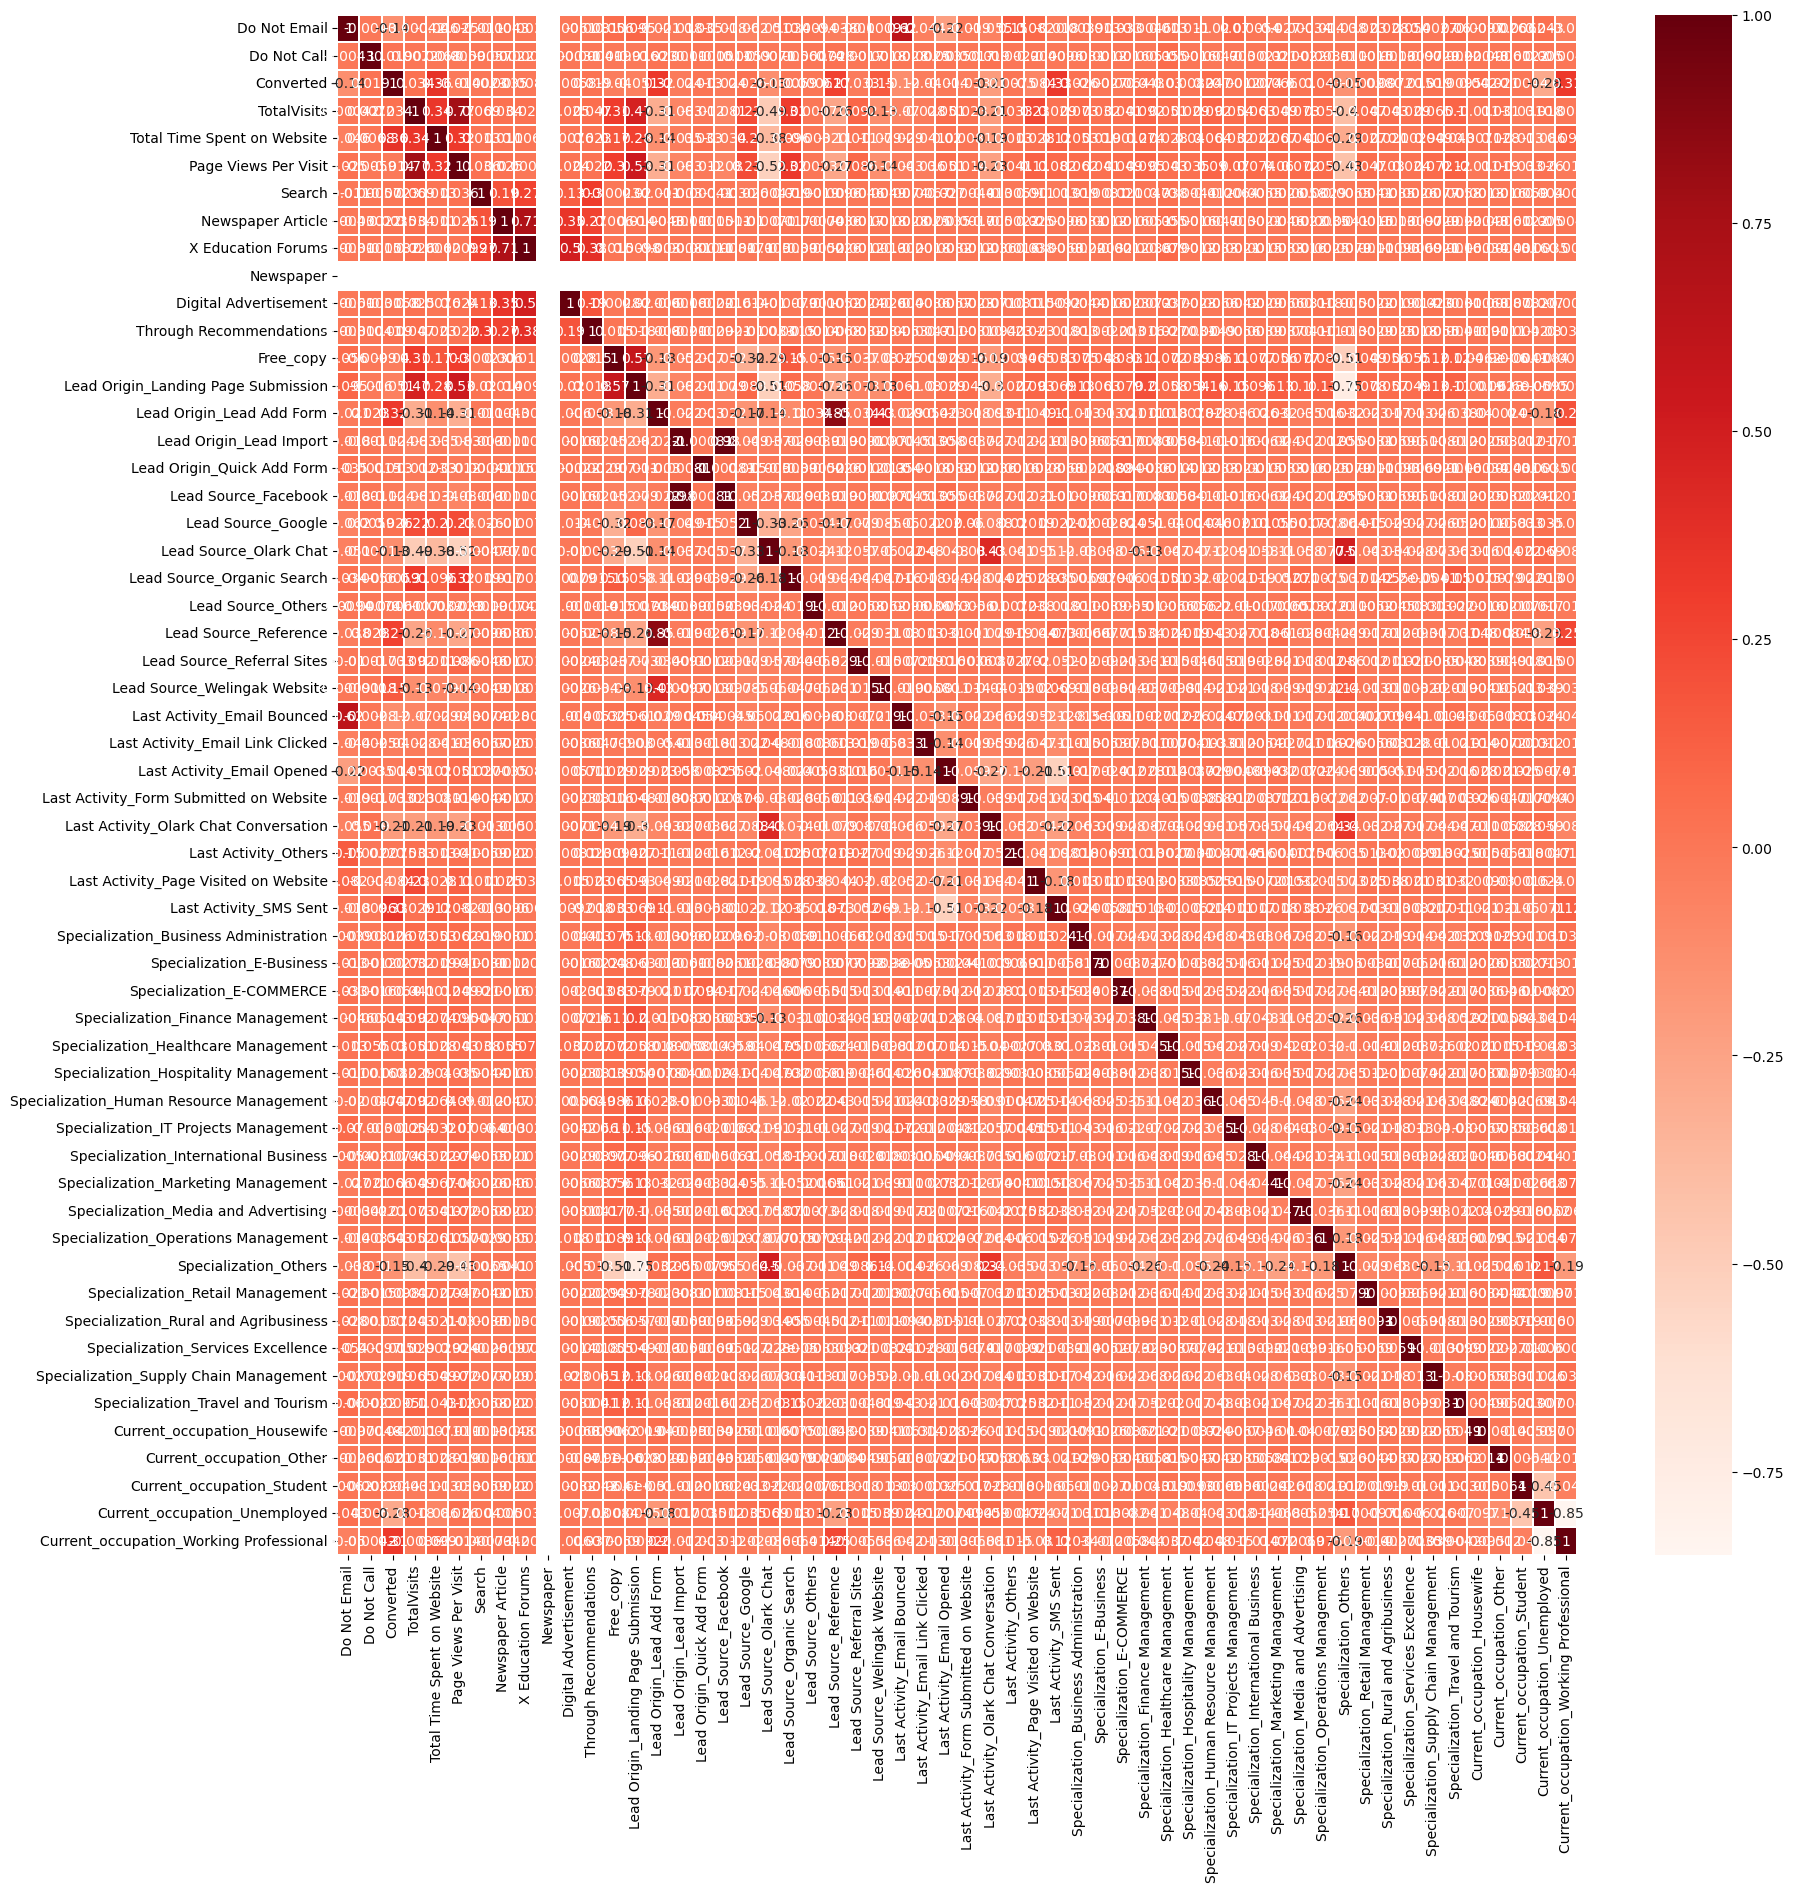

In [105]:
# analyse correlation matrix
plt.figure(figsize = (20,20))        
sns.heatmap(df_leads.corr(),linewidths=0.01,cmap="Reds",annot=True)
plt.show()

In [106]:
# As we cannot see read all values, we can select Columns with Exteme Dark Boxes and craete a seperate Chart.

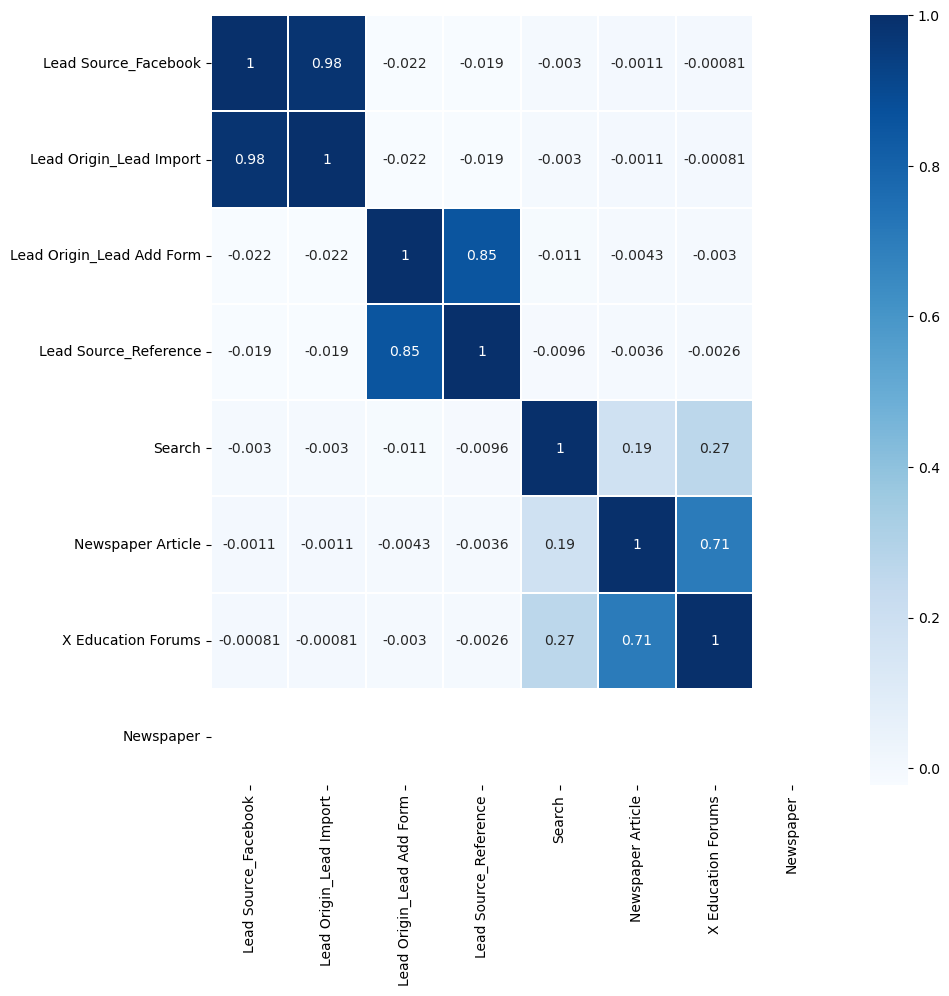

In [107]:

plt.figure(figsize = (10,10))        
sns.heatmap(df_leads[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference",'Search','Newspaper Article','X Education Forums','Newspaper']].corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

In [108]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],axis=1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],axis=1)

# D.  Model Building


### 20. Feature Selection Using RFE (Recursive Feature Elimination)

In [109]:
# Using RFE to reduce variables 
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [110]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 9),
 ('TotalVisits', False, 12),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 13),
 ('Search', False, 33),
 ('Newspaper Article', False, 6),
 ('X Education Forums', False, 17),
 ('Newspaper', False, 39),
 ('Digital Advertisement', False, 7),
 ('Through Recommendations', False, 16),
 ('Free_copy', False, 14),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 20),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 27),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 29),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 24),
 ('Last Activity_Email Link Clicked', False, 15),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 37),
 ('L

In [111]:
# columns which are selected by RFE

In [112]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Current_occupation_Housewife',
       'Current_occupation_Working Professional'],
      dtype='object')

In [113]:
# columns which are not selected by RFE

In [114]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Free_copy',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Oper

In [115]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

### Model 1 (USING ALL COLUMNS SELECTED BY RFE)

In [116]:
# Building model using statsmodels, for the detailed statistics

# columns selected by RFE to be used for this model 
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
LrM1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  

LrM1.params

const                                      -0.880549
Do Not Email                               -1.113161
Total Time Spent on Website                 1.047459
Lead Origin_Landing Page Submission        -1.219755
Lead Source_Olark Chat                      0.928497
Lead Source_Others                          1.084735
Lead Source_Reference                       2.944603
Lead Source_Welingak Website                5.486416
Last Activity_Email Opened                  0.754611
Last Activity_Olark Chat Conversation      -0.717197
Last Activity_Others                        1.415596
Last Activity_SMS Sent                      1.941901
Specialization_Hospitality Management      -1.060641
Specialization_Others                      -1.180957
Current_occupation_Housewife               22.967317
Current_occupation_Working Professional     2.646569
dtype: float64

In [117]:
#Let's see the summary of our logistic regression model
print(LrM1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2709.3
Date:                Thu, 18 Apr 2024   Deviance:                       5418.7
Time:                        01:55:21   Pearson chi2:                 8.20e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3883
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [118]:
get_vif(X_train_rfe)

,Features,VIF
0,Lead Origin_Landing Page Submission,2.78
1,Specialization_Others,2.58
2,Last Activity_Email Opened,2.53
3,Last Activity_SMS Sent,2.26
4,Lead Source_Olark Chat,2.15
5,Last Activity_Olark Chat Conversation,1.75
6,Lead Source_Reference,1.33
7,Total Time Spent on Website,1.25
8,Current_occupation_Working Professional,1.21
9,Do Not Email,1.20


We can see that P Value for "Current_occupation_Housewife" column is very high p-value 0.999, which is above the accepted threshold of 0.05 , Hence we can Drop it. Also its been seen that all VIF value are below the threshold value of 5.00

### Model 2 (DROP "Current_occupation_Housewife" )

In [119]:
# Dropping 'Current_occupation_Housewife' column
rfe_col=rfe_col.drop("Current_occupation_Housewife")

In [120]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
LrM2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

LrM2.params

const                                     -0.872311
Do Not Email                              -1.117864
Total Time Spent on Website                1.046326
Lead Origin_Landing Page Submission       -1.214762
Lead Source_Olark Chat                     0.927594
Lead Source_Others                         1.078488
Lead Source_Reference                      2.962948
Lead Source_Welingak Website               5.486350
Last Activity_Email Opened                 0.752723
Last Activity_Olark Chat Conversation     -0.722372
Last Activity_Others                       1.406916
Last Activity_SMS Sent                     1.931975
Specialization_Hospitality Management     -1.067609
Specialization_Others                     -1.184853
Current_occupation_Working Professional    2.638583
dtype: float64

In [121]:
#Let's see the summary of our logistic regression model
print(LrM2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2716.7
Date:                Thu, 18 Apr 2024   Deviance:                       5433.3
Time:                        01:55:21   Pearson chi2:                 8.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3870
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [122]:
get_vif(X_train_rfe)

,Features,VIF
0,Lead Origin_Landing Page Submission,2.78
1,Specialization_Others,2.58
2,Last Activity_Email Opened,2.53
3,Last Activity_SMS Sent,2.26
4,Lead Source_Olark Chat,2.15
5,Last Activity_Olark Chat Conversation,1.75
6,Lead Source_Reference,1.32
7,Total Time Spent on Website,1.25
8,Current_occupation_Working Professional,1.21
9,Do Not Email,1.20


### Model 3 (Drop "Lead Source_Others")

In [123]:
# Dropping 'Lead Source_Facebook' column
rfe_col=rfe_col.drop("Lead Source_Others")

In [124]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
LrM3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  

LrM3.params

const                                     -0.855087
Do Not Email                              -1.110290
Total Time Spent on Website                1.043936
Lead Origin_Landing Page Submission       -1.225732
Lead Source_Olark Chat                     0.916386
Lead Source_Reference                      2.949361
Lead Source_Welingak Website               5.476113
Last Activity_Email Opened                 0.752973
Last Activity_Olark Chat Conversation     -0.717945
Last Activity_Others                       1.408670
Last Activity_SMS Sent                     1.929261
Specialization_Hospitality Management     -1.071914
Specialization_Others                     -1.194564
Current_occupation_Working Professional    2.632282
dtype: float64

In [125]:
#Let's see the summary of our logistic regression model
print(LrM3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2718.7
Date:                Thu, 18 Apr 2024   Deviance:                       5437.4
Time:                        01:55:22   Pearson chi2:                 8.21e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3866
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [126]:
get_vif(X_train_rfe)

,Features,VIF
0,Lead Origin_Landing Page Submission,2.78
1,Specialization_Others,2.58
2,Last Activity_Email Opened,2.53
3,Last Activity_SMS Sent,2.26
4,Lead Source_Olark Chat,2.15
5,Last Activity_Olark Chat Conversation,1.75
6,Lead Source_Reference,1.32
7,Total Time Spent on Website,1.25
8,Current_occupation_Working Professional,1.21
9,Do Not Email,1.20


### We have reached our FINAL Model which is (Model 3) as we can see that all P values are below 0.05 and VIF Values are also Below 5. 

# E. Model Evaluation

### 21. Creating Prediction

In [127]:
# Predicting the probabilities on the train set
y_train_pred = LrM3.predict(X_train_sm3)          
y_train_pred[:10]

1871    0.472528
6795    0.074714
3516    0.249349
8105    0.781366
3934    0.213398
4844    0.988173
3297    0.110097
8071    0.997163
987     0.195108
7423    0.874450
dtype: float64

In [128]:
# Converting to Array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.47252814, 0.07471353, 0.249349  , 0.78136584, 0.21339822,
       0.98817313, 0.11009663, 0.99716341, 0.19510765, 0.87444968])

In [129]:
# Creating a dataframe with the actual Converted and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.472528
1,0,0.074714
2,0,0.249349
3,0,0.781366
4,0,0.213398


In [130]:
 # Substituting 0 or 1 with the cut off as 0.5

In [131]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

In [132]:
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted
0,0,0.472528,0
1,0,0.074714,0
2,0,0.249349,0
3,0,0.781366,1
4,0,0.213398,0


### 22. Confusion Matrix

In [133]:
# Confusion matrix  (Actual / predicted)
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3587  415]
 [ 846 1620]]


In [134]:

# Predicted (>)    not_converted    converted
# Actual (V)
# not_converted        3587       415
# converted             846      1620

### 23. Accuracy

In [135]:
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8050401978973407


### 24. Sensitivity and Specificity


In [136]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [137]:
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.656934306569343


In [138]:
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8963018490754623


In [139]:
# false postive rate 
print(FP/ float(TN+FP))

0.10369815092453773


In [140]:
# positive predictive value 
print (TP / float(TP+FP))

0.7960687960687961


In [141]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8091585833521318


### 25. Plotting the ROC Curve

In [142]:
# Craeting a function to plot ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [143]:
# Ploting ROC Curve

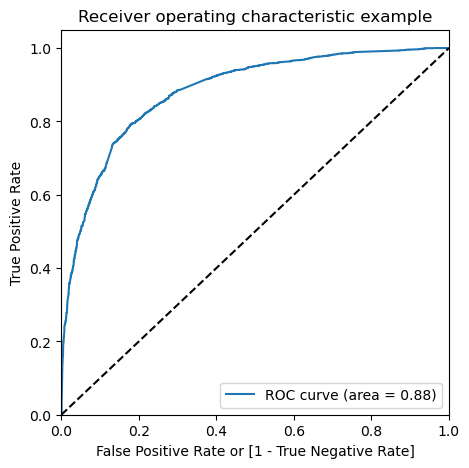

In [144]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'],
                                         drop_intermediate = False )
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])


The area under ROC curve is 0.88.

### 26. Finding Optimal Cutoff Point

In [145]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.472528,0,1,1,1,1,1,0,0,0,0,0
1,0,0.074714,0,1,0,0,0,0,0,0,0,0,0
2,0,0.249349,0,1,1,1,0,0,0,0,0,0,0
3,0,0.781366,1,1,1,1,1,1,1,1,1,0,0
4,0,0.213398,0,1,1,1,0,0,0,0,0,0,0


In [146]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i , accuracy, sensi, speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.586889  0.975264  0.347576
0.2   0.2  0.729283  0.918086  0.612944
0.3   0.3  0.790353  0.836577  0.761869
0.4   0.4  0.810915  0.766829  0.838081
0.5   0.5  0.805040  0.656934  0.896302
0.6   0.6  0.796846  0.593268  0.922289
0.7   0.7  0.782158  0.513788  0.947526
0.8   0.8  0.754329  0.405515  0.969265
0.9   0.9  0.707483  0.248175  0.990505


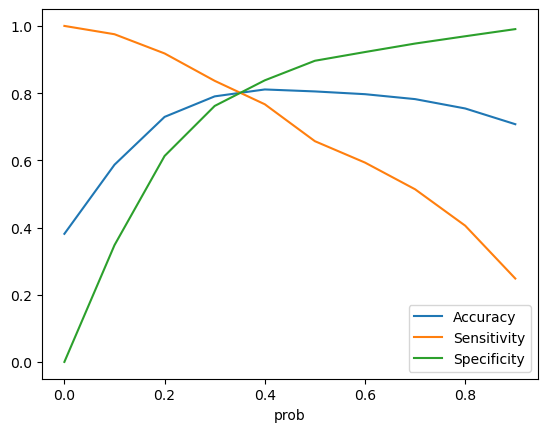

In [147]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

plt.legend(labels=['Accuracy','Sensitivity','Specificity'])

plt.show()

In [148]:
# Approx 0.35 is the point of intersection, we can do mapping agian using optimal cuttoff pint

In [149]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.35 else 0)

# deleting Extra Columns

y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 

y_train_pred_final.head()

,Converted,Converted_Prob,final_predicted
0,0,0.472528,1
1,0,0.074714,0
2,0,0.249349,0
3,0,0.781366,1
4,0,0.213398,0


### 27. Calculating agian all metrics using confusion matrix for Train set with 0.35 cutoff

In [150]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("Confusion Matrix")
print(confusion_matrix,"\n")

Confusion Matrix
[[3223  779]
 [ 489 1977]] 



In [151]:
TN =confusion_matrix[0,0]
TP =confusion_matrix[1,1]
FP =confusion_matrix[0,1]
FN =confusion_matrix[1,0]

In [152]:
print("accuracy:",round((TN+TP)/(TN+TP+FN+FP),5))

accuracy: 0.80396


In [153]:
print("Sensitivity:",round(TP/(TP+FN),5))

Sensitivity: 0.8017


In [154]:
print("Specificity:",round(TN/(TN+FP),5))

Specificity: 0.80535


In [155]:
print("Precision:",round(TP/(TP+FP),5))

Precision: 0.71734


In [156]:
print("Recall:",round(TP/(TP+FN),5))

Recall: 0.8017


In [157]:
print("Model True Positive Rate (TPR):",round(TP/(TP + FN),5))

Model True Positive Rate (TPR): 0.8017


In [158]:
print("Model False Positive Rate (FPR):",round(FP/(FP + TN),5))

Model False Positive Rate (FPR): 0.19465


### 28. Precision and recall tradeoff


In [159]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

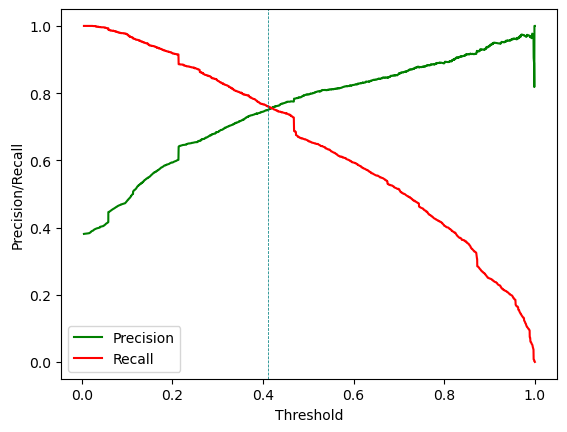

In [160]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

#### Inference:
Based on the precision-recall curve, a threshold of 0.4 provides a good balance between precision and recall.

# F. Making Predictions on test set 

### 29. Scaling Test dataset

In [161]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2772 entries, 4269 to 2960
Data columns (total 53 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              2772 non-null   int64  
 1   Do Not Call                               2772 non-null   int64  
 2   TotalVisits                               2772 non-null   float64
 3   Total Time Spent on Website               2772 non-null   int64  
 4   Page Views Per Visit                      2772 non-null   float64
 5   Search                                    2772 non-null   int64  
 6   Newspaper Article                         2772 non-null   int64  
 7   X Education Forums                        2772 non-null   int64  
 8   Newspaper                                 2772 non-null   int64  
 9   Digital Advertisement                     2772 non-null   int64  
 10  Through Recommendations               

In [162]:
# Scaling Test Data Set

In [163]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


X_test = X_test[rfe_col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,Current_occupation_Working Professional
4269,0,0.964504,0,0,0,0,0,0,0,1,0,1,0
2376,0,-0.885371,0,0,1,0,0,0,0,1,0,1,0
7766,0,-0.777416,0,0,0,0,0,0,1,0,0,0,1
9199,0,-0.885371,0,1,0,0,0,1,0,0,0,1,0
4359,0,-0.885371,0,0,1,0,1,0,0,0,0,0,0


### 30. Prediction on Test Dataset using final model 

In [164]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 14)

In [165]:
# making prediction using model 4 (final model)
y_test_pred = LrM3.predict(X_test_sm)

In [166]:
# top 10 columns
y_test_pred[:10]

4269    0.708165
2376    0.870423
7766    0.914846
9199    0.058664
4359    0.872470
9186    0.523277
1631    0.421372
8963    0.153289
8007    0.087225
5324    0.316435
dtype: float64

In [167]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.708165
2376,0.870423
7766,0.914846
9199,0.058664
4359,0.872470


In [168]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [169]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.708165
1,1,2376,0.870423
2,1,7766,0.914846
3,0,9199,0.058664
4,1,4359,0.872470


In [170]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.708165
1,2376,1,0.870423
2,7766,1,0.914846
3,9199,0,0.058664
4,4359,1,0.872470


In [171]:
# taking sensitivity-specificity method at 0.35 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.708165,1
1,2376,1,0.870423,1
2,7766,1,0.914846,1
3,9199,0,0.058664,0
4,4359,1,0.872470,1


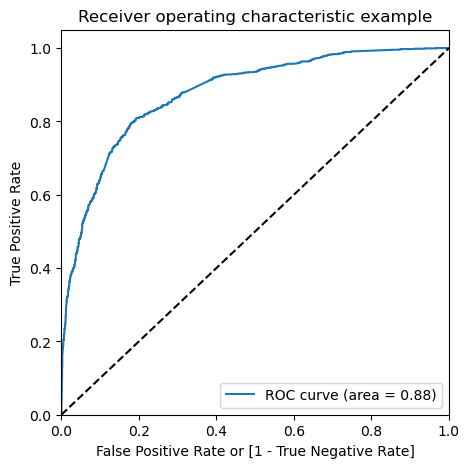

In [172]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

 Area under ROC curve is 0.88 out of 1 which indicates a good predictive model

### 10.3 Test set Model Evaluation
- Calculating all metrics using confusion matrix for Test set

In [ ]:
TN =confusion_matrix[0,0]
TP =confusion_matrix[1,1]
FP =confusion_matrix[0,1]
FN =confusion_matrix[1,0]

In [173]:
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("Confusion Matrix")
print(confusion_matrix,"\n")

Confusion Matrix
[[1363  314]
 [ 219  876]] 



In [175]:
print("accuracy:",round((TN+TP)/(TN+TP+FN+FP),5))

accuracy: 0.80772


In [176]:
print("Sensitivity:",round(TP/(TP+FN),5))

Sensitivity: 0.8


In [177]:
print("Specificity:",round(TN/(TN+FP),5))

Specificity: 0.81276


In [178]:
print("Precision:",round(TP/(TP+FP),5))

Precision: 0.73613


In [179]:
print("Recall:",round(TP/(TP+FN),5))

Recall: 0.8


In [180]:
print("Model True Positive Rate (TPR):",round(TP/(TP + FN),5))

Model True Positive Rate (TPR): 0.8


In [181]:
print("Model False Positive Rate (FPR):",round(FP/(FP + TN),5))

Model False Positive Rate (FPR): 0.18724


<hr/>

# G. Conclusion :

Train Data Set:
* Accuracy: 80.39%
* Sensitivity: 80.17%
* Specificity: 80.53%



Test Data Set:
* Accuracy: 80.77%
* Sensitivity: 80.00%
* Specificity: 81.27%